In [180]:
import matplotlib.pyplot as plt
import math
import numpy as np
from anastruct import SystemElements

In [181]:
ss = SystemElements()

In [182]:
nodes = {
    'A': (4,2),
    'B': (0, (4* np.tan(np.deg2rad(30)))+2), 
    'C': (0, 0),
    'D': (2,2),
    'E': (2,0),
    'F': (4,0),
    'G': (6,0)
}

nodes_names = list(nodes.keys())
cncts = [('A', 'B'), ('A', 'D'), ('A', 'F'), ('A', 'G'),
         ('C', 'D'), ('C', 'E'), 
         ('D', 'E'), ('E', 'F'), ('F', 'G')]

In [183]:
for connection in cncts:
    element_truss = [list(nodes.get(connection[0])), list(nodes.get(connection[1]))]
    ss.add_element(location = element_truss)

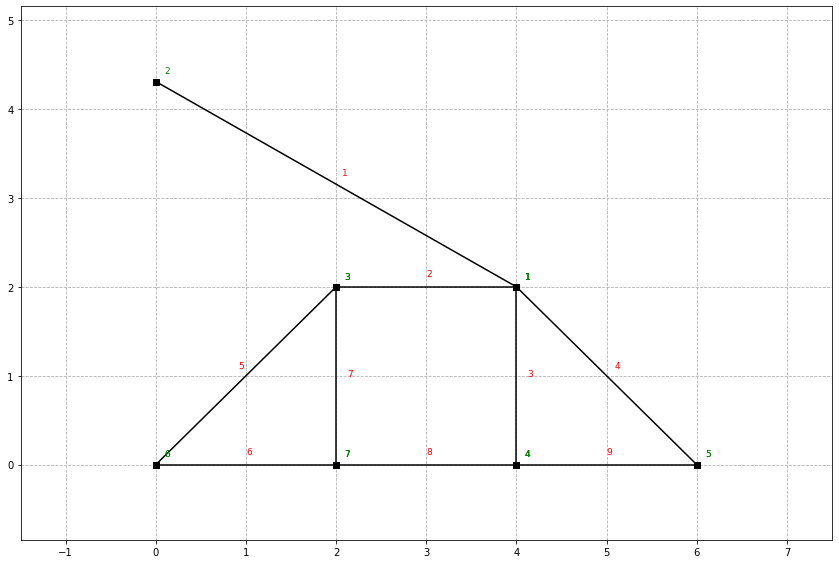

In [184]:
fig = ss.show_structure(scale = 0.75, show=False)
plt.grid(linestyle='--')
plt.show()

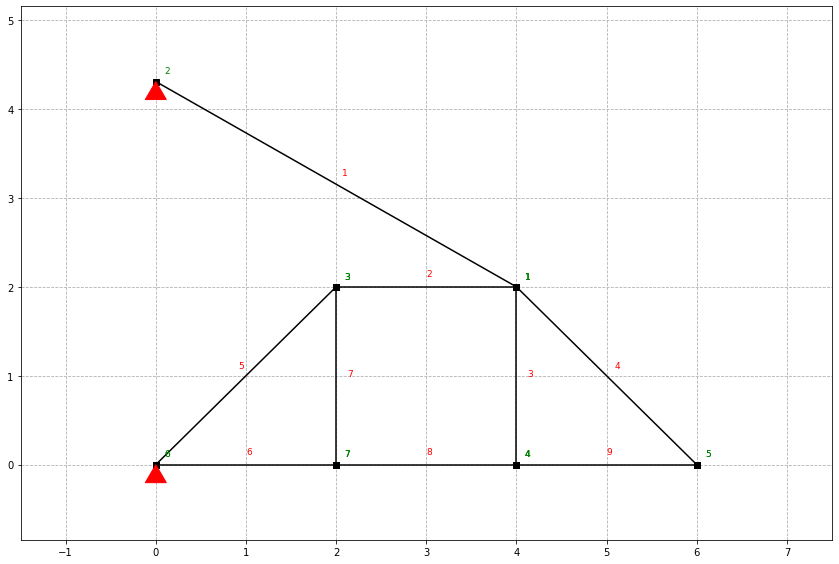

In [185]:
reation_C = ss.find_node_id(list(nodes.get('C')))
reation_B = ss.find_node_id(list(nodes.get('B')))

ss.add_support_hinged(node_id=reation_B)
ss.add_support_hinged(node_id=reation_C)

fig = ss.show_structure(scale = 0.75, show=False)
plt.grid(linestyle='--')
plt.show()

In [186]:
extern_force= [-3000, -4000]

In [187]:
for i, node in enumerate(['E', 'F']):
    extern_force_loc = ss.find_node_id(list(nodes.get(f'{node}')))
    ss.point_load(node_id=extern_force_loc, Fy=extern_force[i])
ss.solve()

array([ 0.37785706,  2.97952886, -0.50299534,  0.        ,  0.        ,
       -0.5251385 ,  0.91284716,  1.85065775, -0.54751927, -0.44368859,
        3.35016683, -0.42140449, -0.48652669,  4.04918119, -0.37991859,
        0.        ,  0.        , -0.97882224, -0.29799631,  2.05274744,
       -0.81562824])

**Observação:** Apoios de segundo gênero são as composições de apoios de primeiro gênero em direções distintas 

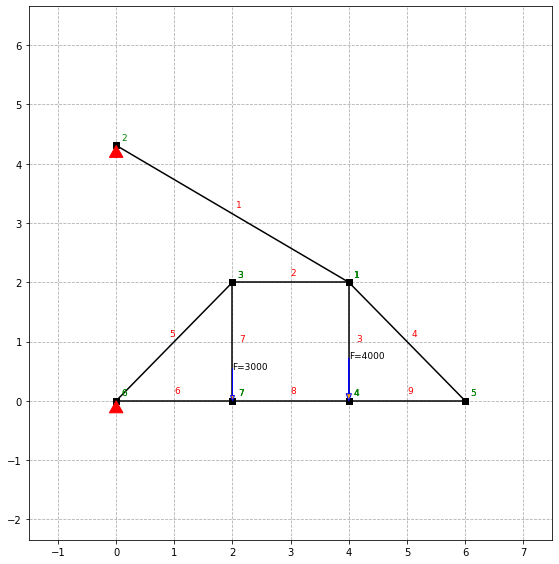

In [188]:
fig = ss.show_structure(scale = 0.75, figsize=(8,8), show=False)
plt.grid(linestyle='--')
plt.show()

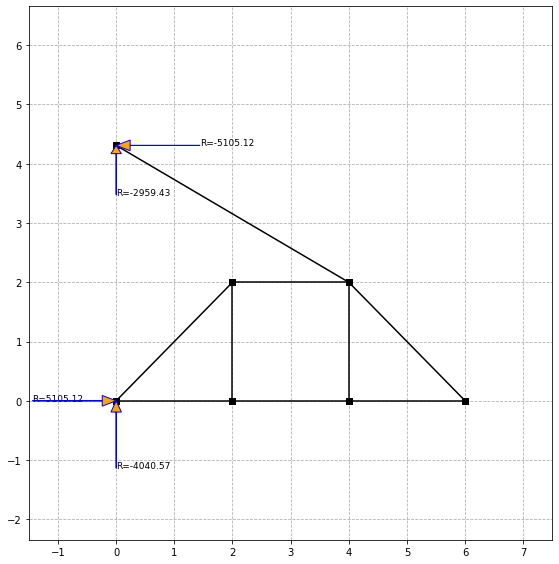

In [189]:
fig = ss.show_reaction_force(scale = 0.75, figsize=(8,8), show=False)
plt.grid(linestyle='--')
plt.show()

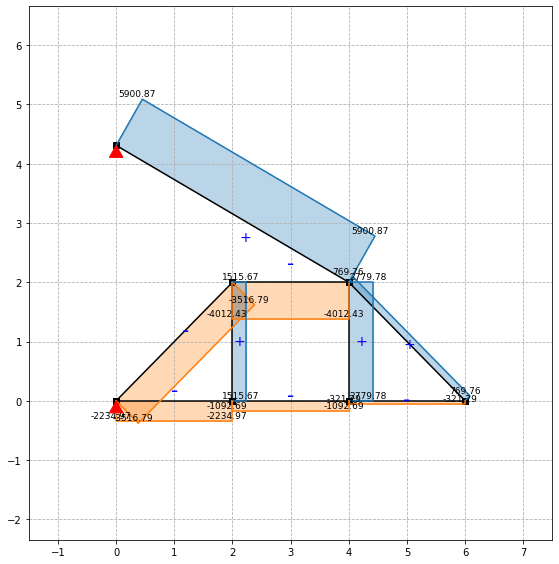

In [190]:
fig = ss.show_axial_force(scale = 0.75, figsize=(8,8), show=False, values_only=False)
plt.grid(linestyle='--')
plt.show()

In [191]:
results = ss.get_element_results()
for result in results:
    print(result)

{'id': 1, 'length': 4.618802070617676, 'alpha': -0.5235987678264864, 'u': 0.036339964497329284, 'N': 5900.874936031224, 'wmax': -4.259678867903224e-05, 'wmin': 0.013095469891039635, 'w': None, 'Mmin': -47.941356229529674, 'Mmax': 0.0, 'M': None, 'Qmin': -10.379608282958625, 'Qmax': -10.379608282958614, 'Q': None, 'q': (0.0, 0.0)}
{'id': 2, 'length': 2.0, 'alpha': -0.0, 'u': -0.010699802006215826, 'N': -4012.4257523309348, 'wmax': -0.0015754033001131671, 'wmin': 0.01587935183894482, 'w': None, 'Mmin': -698.9835210690767, 'Mmax': 476.3638404612948, 'M': None, 'Qmin': -587.6736807651866, 'Qmax': -587.6736807651848, 'Q': None, 'q': (0.0, 0.0)}
{'id': 3, 'length': 2.0, 'alpha': -1.5707963267948966, 'u': 0.007412759434496022, 'N': 2779.7847879360083, 'wmax': -0.00041970908636166846, 'wmin': 0.025718463971452027, 'w': None, 'Mmin': -975.3834225903988, 'Mmax': 567.4291888577131, 'M': None, 'Qmin': 771.4063057240545, 'Qmax': 771.4063057240567, 'Q': None, 'q': (0.0, 0.0)}
{'id': 4, 'length': 2.8